# Немного о самом PCA

## Что было раньше?

Набор данных:

*   Строки -- объекты
*   Столбцы -- признаки

Например:







In [ ]:
import pandas as pd
link = "https://studio.openedu.ru/assets/courseware/v1/a11f0b9cb0074fdacc112eee71eb0b67/asset-v1:ITMOUniversity+DATANTECH2035+fall_2021+type@asset+block/candy-data.csv"
DATA = pd.read_csv(link, delimiter=',', index_col='competitorname')
DATA.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
competitorname,,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1


## Что хотим?



*   будем работать непосредственно с **признаками**, т.е. со столбцами
*   хотим **уменьшить** количество признаков
*   **не хотим просто выкинуть** какие-то признаки


Цель: преобразовать признаки в новые с сохранением **максимальной информативности**

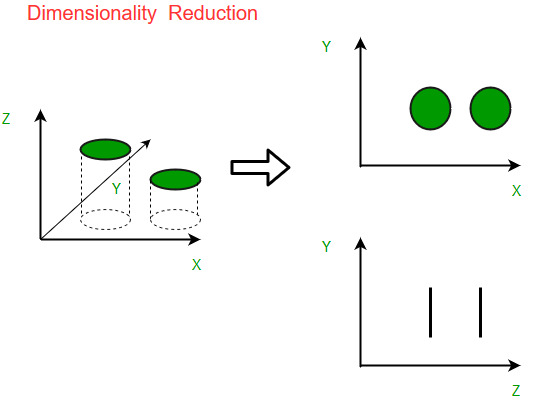




## Зачем?

*   Предварительная обработка данных (иногда признаков очень много) -> "облегчение" моделей
*   Визуализация
*   Сжатие с потерями

# Детали

Идея: добавляем попарно ортогональные направления для конструирования пространства, на которое ортогонально спроектируем исходные данные — получаем новый набор данных

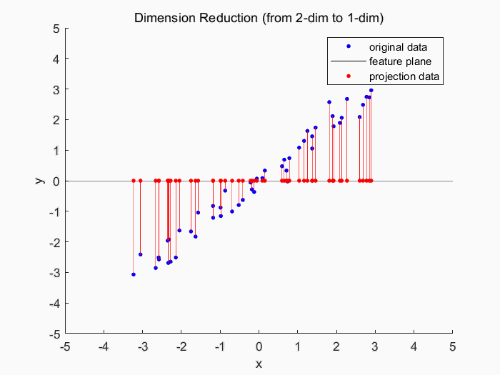

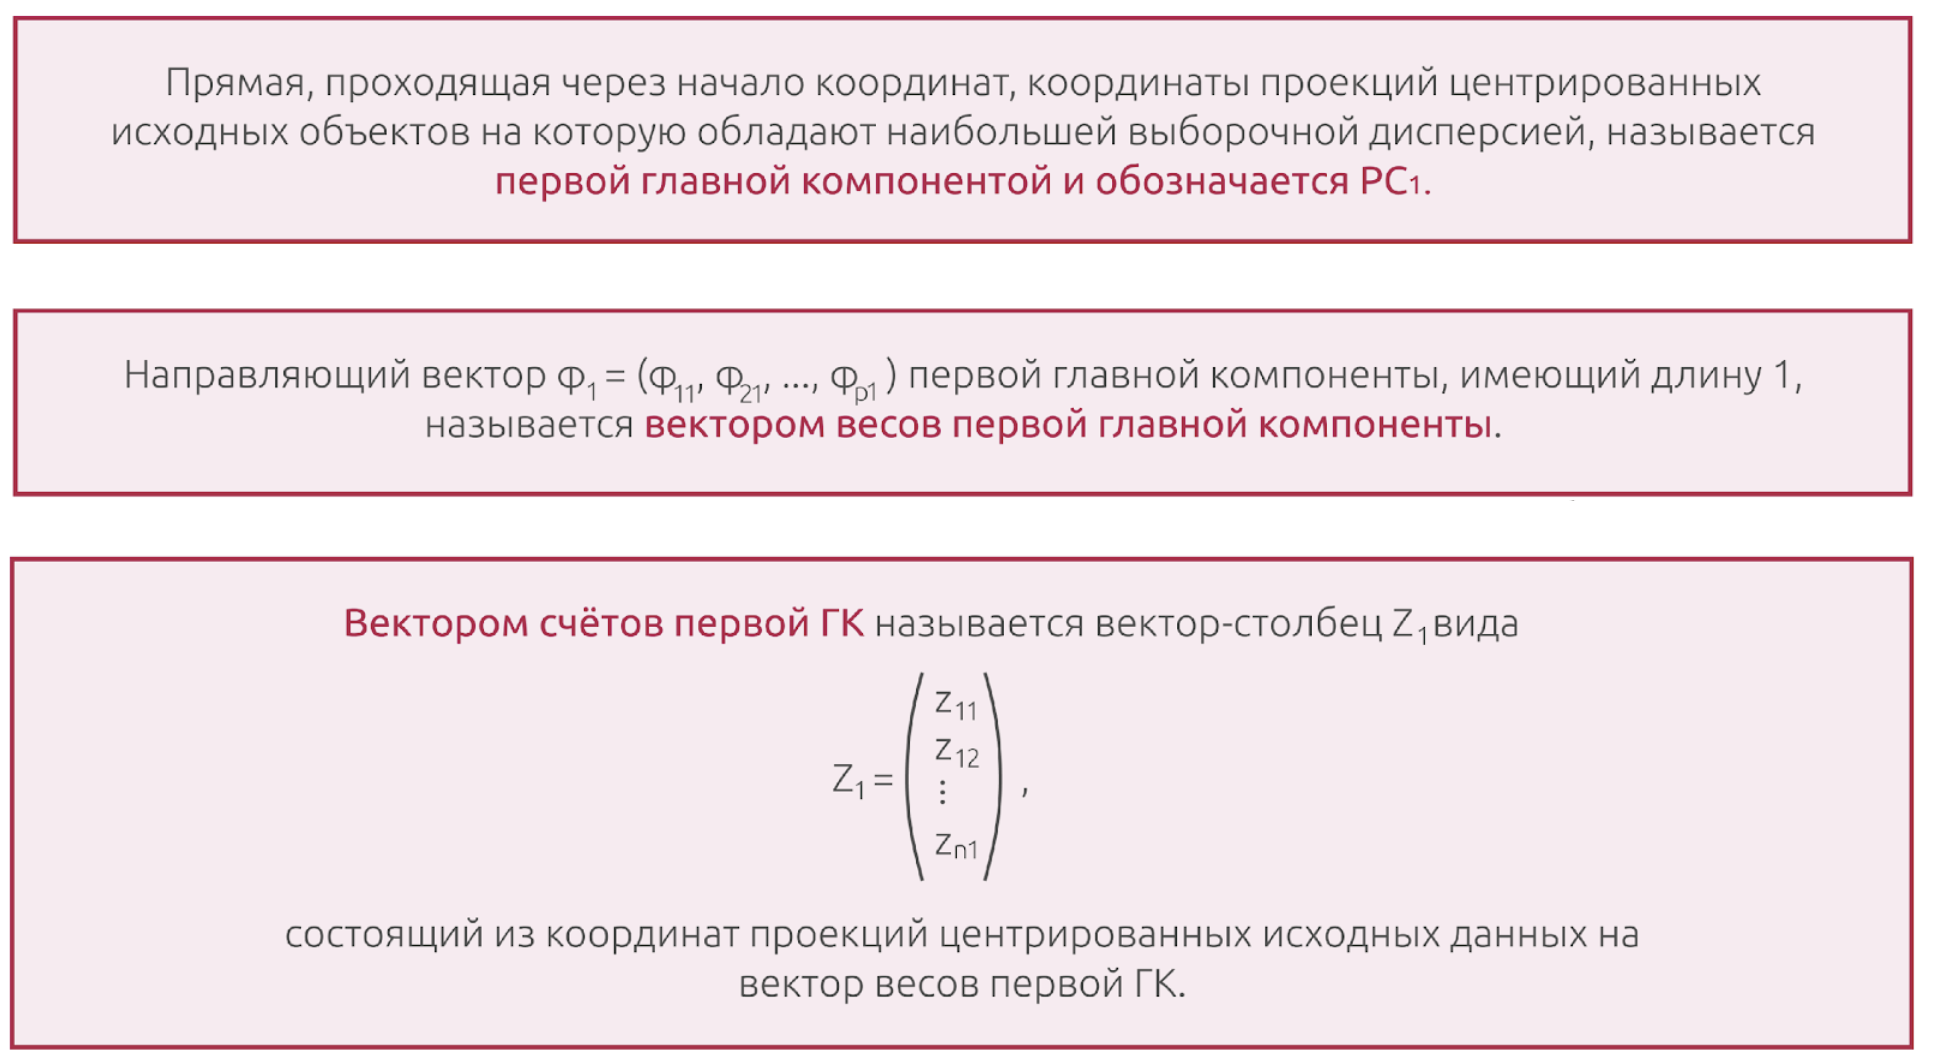

Подключим требующиеся для моделирования дальнейшего библиотеки

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

Сгенерируем набор данных

In [ ]:
x = np.arange(1,11)
np.random.seed(2)
y = 2 * (x + np.random.randn(10))
data = pd.DataFrame({'x': x, 'y': y})

Визуализируем то, что получилось после генерации:

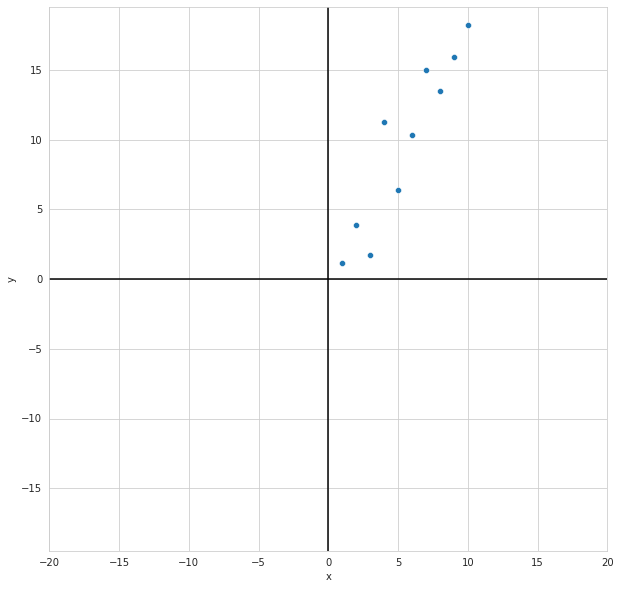

In [ ]:
plt.figure(figsize=[10, 10])
plt.axis('equal')
plt.xlim([-20, 20])
plt.ylim([-20, 20])
plt.axhline(0,color='black') # x = 0
plt.axvline(0,color='black') # y = 0
sns.scatterplot(data = data, x='x', y='y')

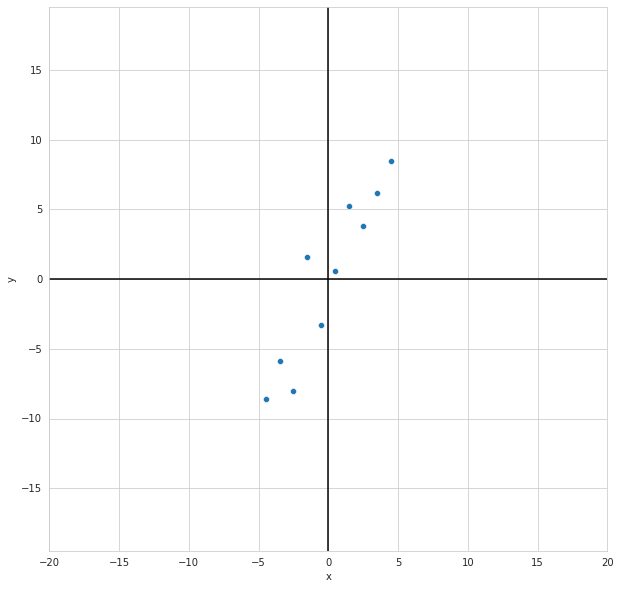

In [ ]:
#@title Для наглядности картинки центрируем объекты (хотя библиотека это делает самостоятельно)
centered_data = data - (x.mean(), y.mean())
plt.figure(figsize=[10, 10])
plt.axis('equal')
plt.xlim([-20, 20])
plt.ylim([-20, 20])
plt.axhline(0,color='black') # x = 0
plt.axvline(0,color='black') # y = 0
sns.scatterplot(data = centered_data, x='x', y='y')

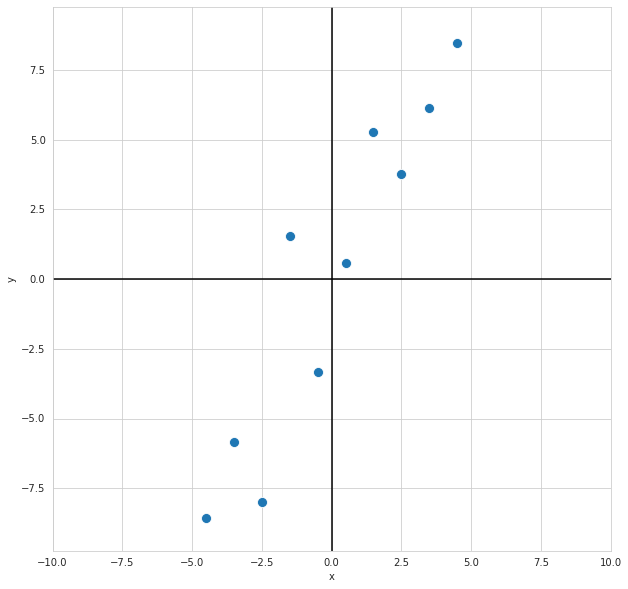

In [ ]:
#@title Теперь можем немного изменить масштаб
centered_data = data - (x.mean(), y.mean())
plt.figure(figsize=[10, 10])
plt.axis('equal')
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.axhline(0,color='black') # x = 0
plt.axvline(0,color='black') # y = 0
sns.scatterplot(data = centered_data, x='x', y='y', s=100)

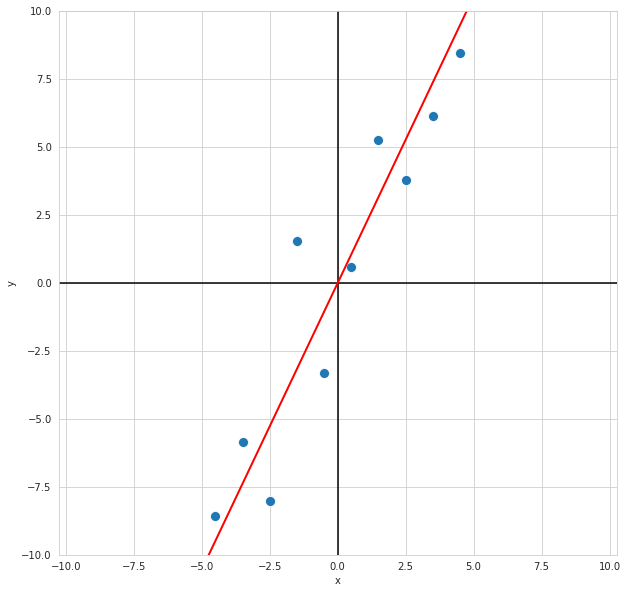

In [ ]:
#@title Применим метод и посмотрим, как будет выглядеть первая ГК

from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'full', n_components = 2)
pca.fit(data)

plt.figure(figsize=[10, 10])
plt.axis('equal')
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.axhline(0,color='black') # x = 0
plt.axvline(0,color='black') # y = 0
sns.scatterplot(data = centered_data, x='x', y='y', s=100)
plt.plot([-10, 10], [-10*pca.components_[0][1]/pca.components_[0][0], 10*pca.components_[0][1]/pca.components_[0][0]], color = 'red', linewidth=2)

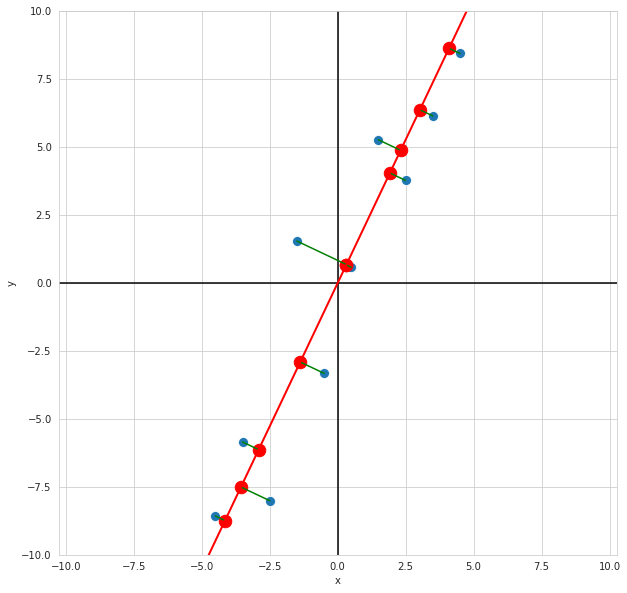

In [ ]:
#@title Проекции точек на нее
phi_1 = pca.components_[0]
centered_projections = np.dot(centered_data, phi_1.T)
plt.figure(figsize=[10, 10])
plt.axis('equal')
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.axhline(0,color='black') # x = 0
plt.axvline(0,color='black') # y = 0

recovered = np.dot(centered_projections.reshape(-1, 1), phi_1.reshape(1, -1))
sns.scatterplot(data = centered_data, x='x', y='y', s=100)

plt.plot(recovered[:, 0], recovered[:, 1], '.', markersize=25, color='red')

for i in range(len(data.values)):
  plt.plot([centered_data.values[i, 0], recovered[i, 0]],
           [centered_data.values[i, 1], recovered[i, 1]],
           '-', color='green')
plt.plot([phi_1[0] * -20, phi_1[0] * 20], [phi_1[1] * -20, phi_1[1] * 20], color='red', linewidth=2)
plt.show()

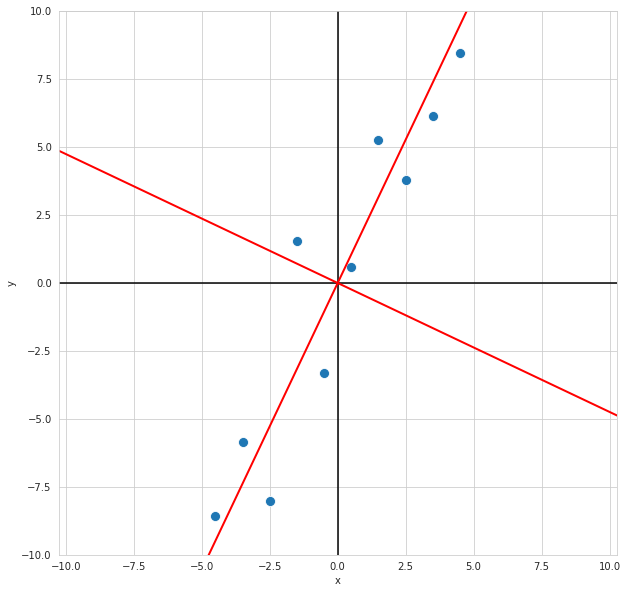

In [ ]:
#@title Если захотим использовать вторую ГК, то можно посмотреть, каким образом она будет проходить:
phi_1 = pca.components_[0]
phi_2 = pca.components_[1]
centered_projections = np.dot(centered_data, phi_1.T)
plt.figure(figsize=[10, 10])
plt.axis('equal')
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.axhline(0,color='black') # x = 0
plt.axvline(0,color='black') # y = 0

recovered = np.dot(centered_projections.reshape(-1, 1), phi_1.reshape(1, -1))
sns.scatterplot(data = centered_data, x='x', y='y', s=100)

plt.plot([phi_1[0] * -20, phi_1[0] * 20], [phi_1[1] * -20, phi_1[1] * 20], color='red', linewidth=2)
plt.plot([phi_2[0] * -20, phi_2[0] * 20], [phi_2[1] * -20, phi_2[1] * 20], color='red', linewidth=2)
plt.show()

Найдем новые координаты

In [ ]:
X = pca.transform(data)
X = pd.DataFrame({'PC_1': X[:,0], 'PC_2': X[:,1]})
X

,PC_1,PC_2
0,9.672358,0.392910
1,6.785349,0.655439
2,8.308289,-1.173671
3,-0.751543,2.016625
4,3.217734,-0.972781
5,-0.737595,-0.203548
6,-5.402986,0.902466
7,-4.479550,-0.642299
8,-7.053660,-0.528179
9,-9.558395,-0.446963


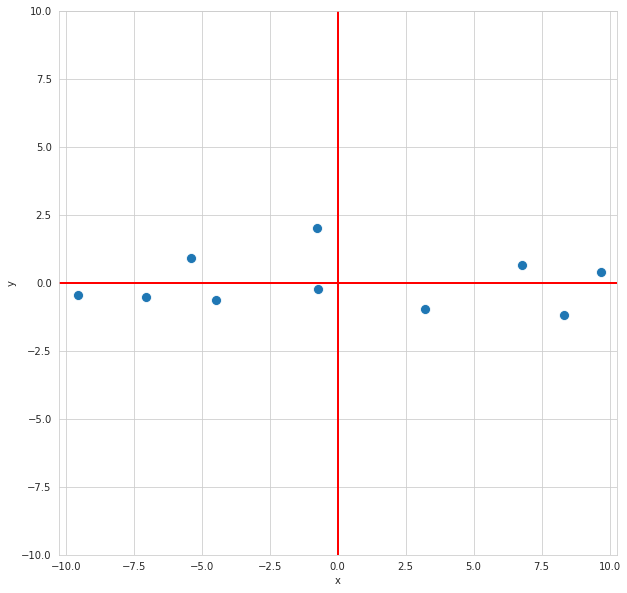

In [ ]:
#@title В новой системе координат
plt.figure(figsize=[10, 10])
plt.axis('equal')
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.axhline(0,color='red',linewidth=2)
plt.axvline(0,color='red',linewidth=2)

recovered = np.dot(centered_projections.reshape(-1, 1), phi_1.reshape(1, -1))
sns.scatterplot(data = X, x='x', y='y', s=100)

Информативность при использовании только одной ГК

In [ ]:
pca.explained_variance_

array([45.60683046,  0.96908145])

In [ ]:
pca.explained_variance_ratio_

array([0.97919351, 0.02080649])

## Еще раз, но реализуем метод самостоятельно

Алгоритм:


1.   Сначала объекты центрируются, т.е. из значений в столбце вычитается среднее по этому столбцу, и так для каждого столбца
2.   Имея матрицу центрированных объектов, вычисляется выборочная матрица ковариаций:
$$
\Theta = \frac{1}{n} \left(F^T \cdot F \right)
$$
3.   Собственные числа — выборочные дисперсии счетов (по, относительно) соответствующей ГК
4.   Ортонормированный набор собственных векторов — векторы весов





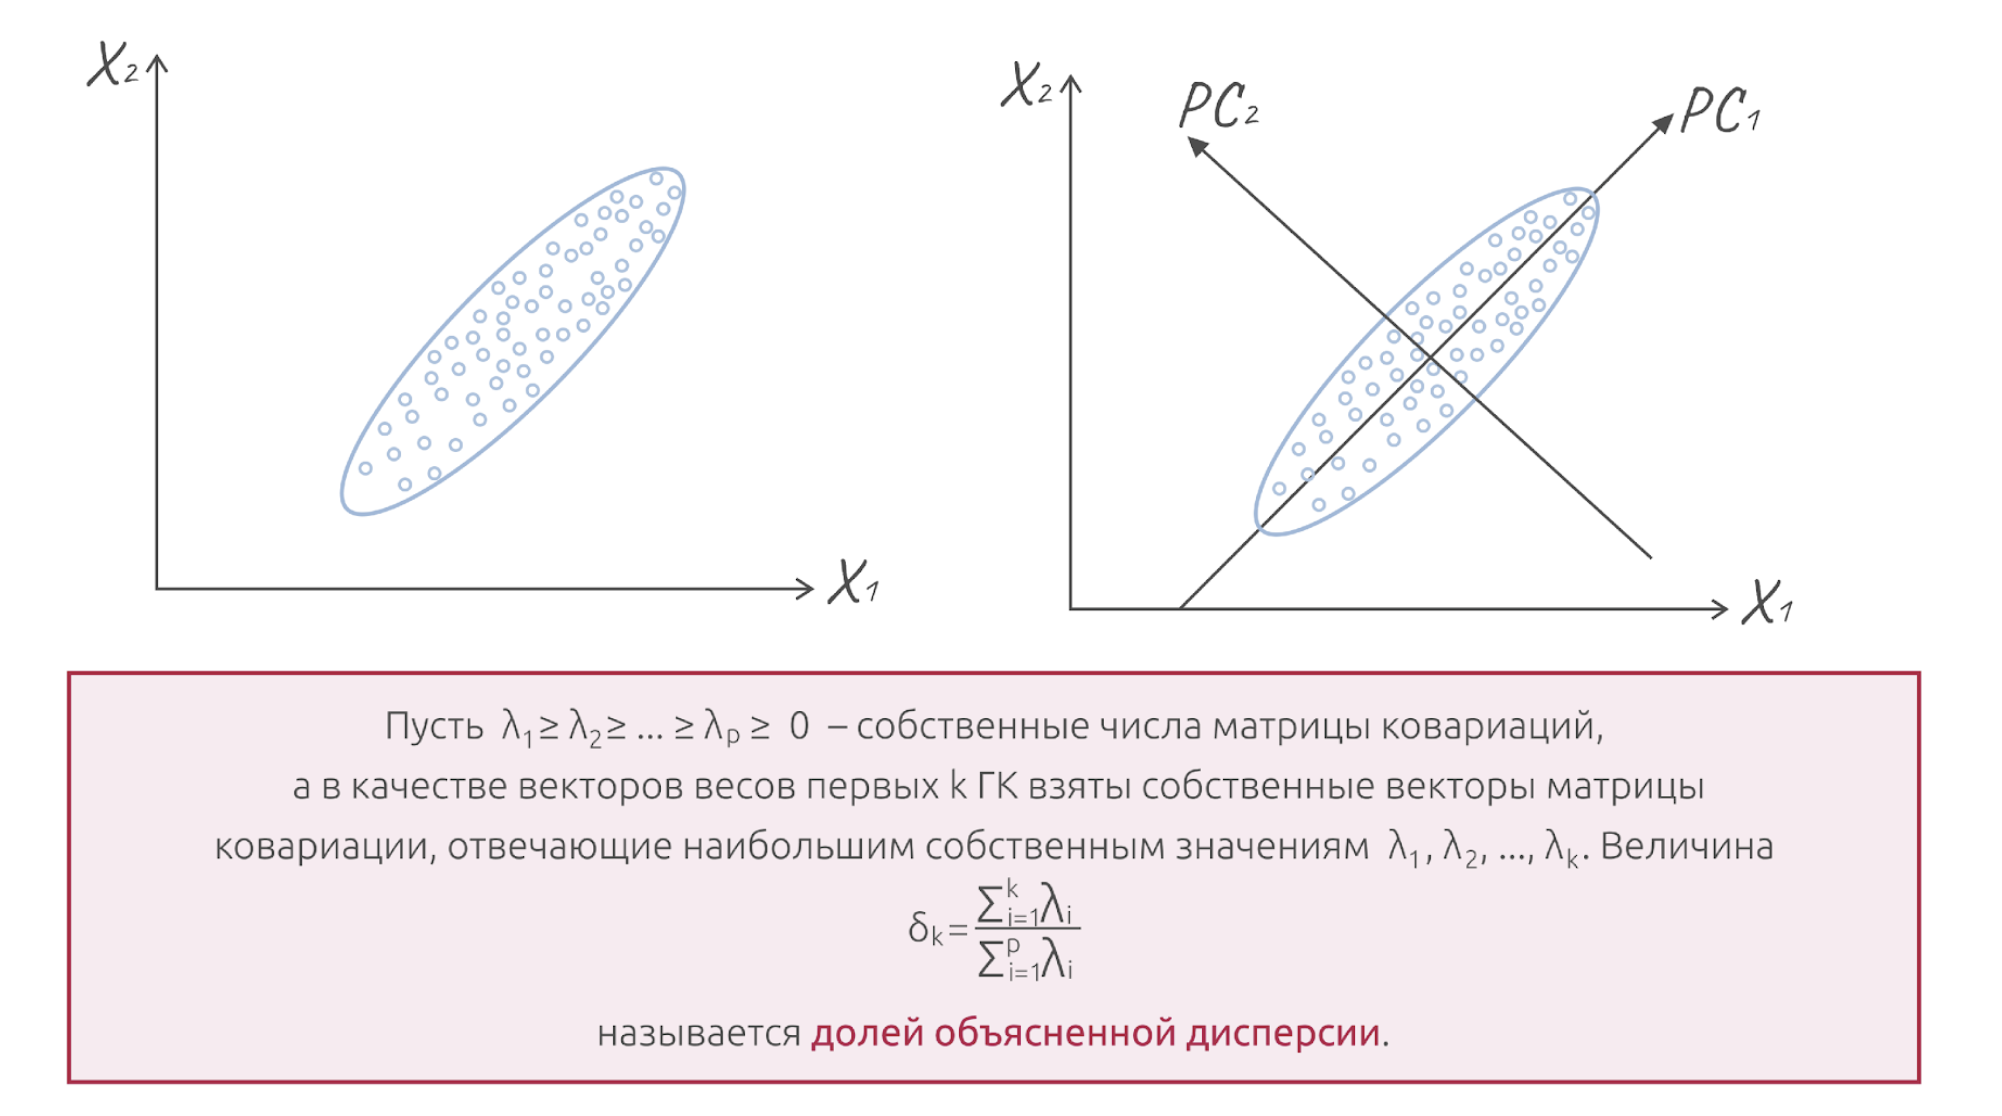

In [ ]:
x = np.arange(1,11)
np.random.seed(2)
y = 2 * (x + np.random.randn(10))
data = pd.DataFrame({'x': x, 'y': y})

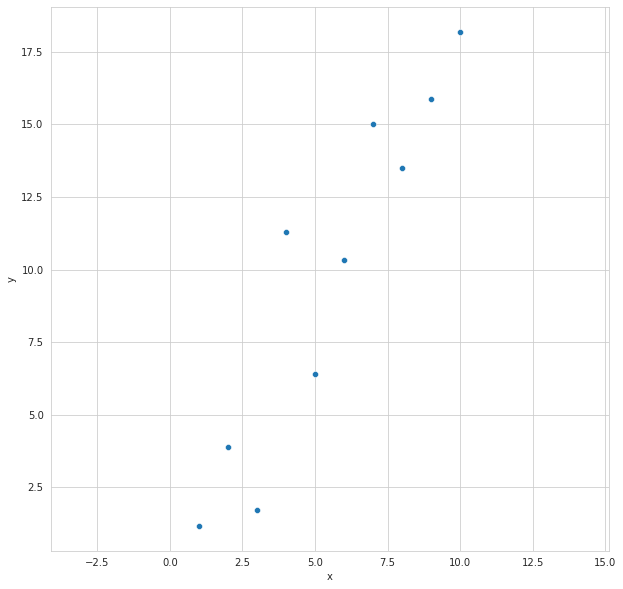

In [ ]:
plt.figure(figsize=[10, 10])
plt.axis('equal')
sns.scatterplot(data = data, x='x', y='y')

Начнем применять алгоритм PCA. Сначала центрируем наши данные:

In [ ]:
centered_data = data - (x.mean(), y.mean())

Посмотрим, что все прошло корректно:

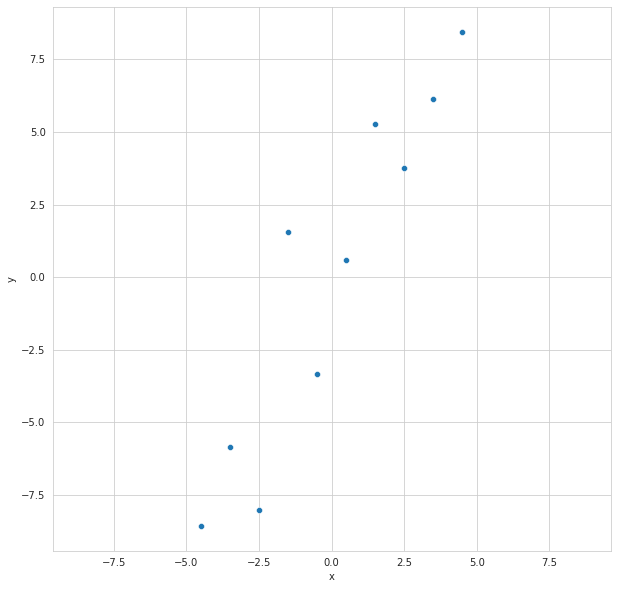

In [ ]:
plt.figure(figsize=[10, 10])
plt.axis('equal')
sns.scatterplot(data = centered_data, x='x', y='y')

Вычислим матрицу выборочных ковариаций:

In [ ]:
F = np.dot(centered_data.T, centered_data)/(len(centered_data.index))
F

array([[ 8.25      , 15.55520144],
       [15.55520144, 33.66832072]])

Можно воспользоваться и встроенными в `numpy` функциями:

In [ ]:
F_numpy = np.cov(centered_data.T)
F_numpy

array([[ 9.16666667, 17.28355716],
       [17.28355716, 37.40924525]])

Видите, как бывает полезно проверить, а что на самом деле делает библиотека. Впрочем, все достаточно очевидно.

In [ ]:
F_numpy = np.cov(centered_data.T, ddof = 0)
F_numpy

array([[ 8.25      , 15.55520144],
       [15.55520144, 33.66832072]])

Теперь найдем собственные числа и соответсвующие им собственные векторы

In [ ]:
eigvalues, eigvectors = np.linalg.eig(F)

print(eigvalues)
print(eigvectors)

[ 0.8721733  41.04614742]
[[-0.90352259 -0.42854046]
 [ 0.42854046 -0.90352259]]


Собственыне числа показывают дисперсии. Значит, среднеквадратические отклонения `sigma` — корни из дисперсии. Увидим, какой разброс «в среднем» гарантирует нам статистика (`axes`):

In [ ]:
axes = eigvectors

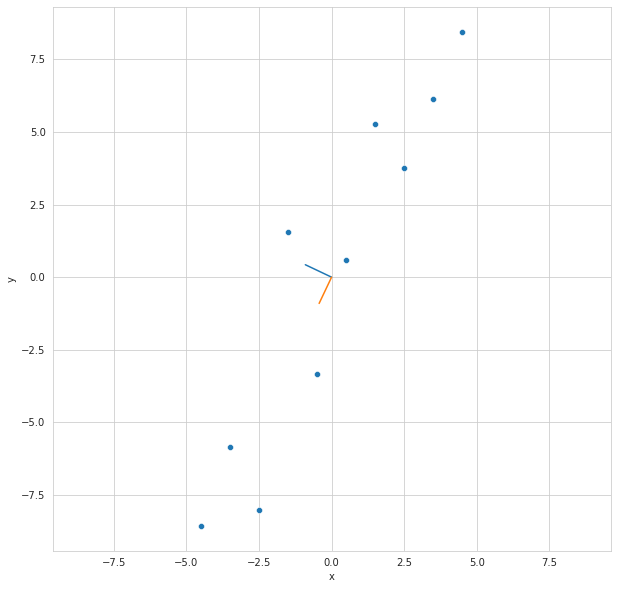

In [ ]:
plt.figure(figsize=[10, 10])
plt.axis('equal')
sns.scatterplot(data = centered_data, x = 'x', y = 'y')

for i in range(2):
  sns.lineplot(x=[0, axes[0, i]], y = [0, axes[1, i]])

plt.show()

Геометрически очевидно, что первая ГК должна идти вдоль оранжевого направления. Какой брать собственный вектор?

In [ ]:
eigvalues

array([ 0.8721733 , 41.04614742])

In [ ]:
phi_1 = eigvectors[:, 1]
phi_1

array([-0.42854046, -0.90352259])

In [ ]:
centered_projections = np.dot(centered_data, phi_1.T)
centered_projections

array([ 9.67235779,  6.78534858,  8.30828911, -0.75154288,  3.21773409,
       -0.73759517, -5.40298578, -4.47955014, -7.05366016, -9.55839543])

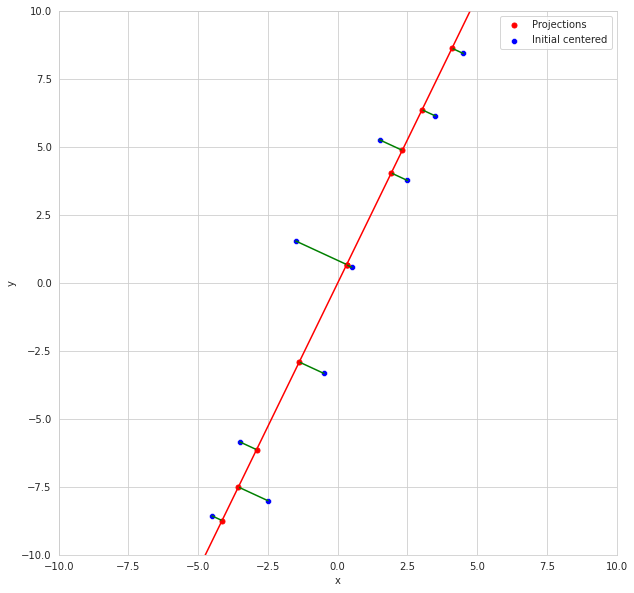

In [ ]:
plt.figure(figsize=[10, 10])
plt.xlim([-10, 10])
plt.ylim([-10, 10])

recovered = np.dot(centered_projections.reshape(-1, 1), phi_1.reshape(1, -1))

sns.scatterplot(data = centered_data, x = 'x', y = 'y', color = 'blue')

plt.plot(recovered[:, 0], recovered[:, 1], '.', markersize=10, color='red')

plt.legend(['Projections', 'Initial centered'])

for i in range(len(data.values)):
  plt.plot([centered_data.values[i, 0], recovered[i, 0]],
           [centered_data.values[i, 1], recovered[i, 1]],
           '-', color='green')

plt.plot([phi_1[0] * -20, phi_1[0] * 20], [phi_1[1] * -20, phi_1[1] * 20], color='red')

plt.show()

In [ ]:
from sklearn.decomposition import PCA

X = PCA(svd_solver = 'full', n_components = 1).fit_transform(centered_data)
X

array([[ 9.67235779],
       [ 6.78534858],
       [ 8.30828911],
       [-0.75154288],
       [ 3.21773409],
       [-0.73759517],
       [-5.40298578],
       [-4.47955014],
       [-7.05366016],
       [-9.55839543]])

In [ ]:
np.unique((np.round(X.reshape(1, -1),5) == np.round(centered_projections,5)))

array([ True])

In [ ]:
PCA(svd_solver = 'full', n_components = 1).fit(centered_data).components_

array([[-0.42854046, -0.90352259]])

# Пример применения PCA

Покажем применение PCA для визуализации и последующей возможности классификации (кластеризации) в известном наборе данных [iris (Ирисы Фишера)](https://ru.wikipedia.org/wiki/Ирисы_Фишера)

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris_dataset = load_iris()
iris = pd.DataFrame(iris_dataset.data, columns = iris_dataset.feature_names)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
X_iris = PCA(svd_solver = 'full', n_components=2).fit_transform(iris)
X_iris.shape

(150, 2)

In [ ]:
X_df = pd.DataFrame(X_iris, columns=['x', 'y'])
X_df['target'] = iris_dataset.target
X_df

,x,y,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0
...,...,...,...
145,1.944110,0.187532,2
146,1.527167,-0.375317,2
147,1.764346,0.078859,2
148,1.900942,0.116628,2


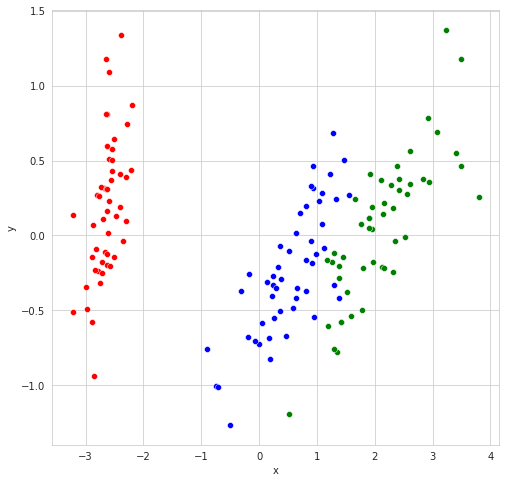

In [ ]:
plt.figure(figsize=(8, 8))
for i in range(3):
  X_temp = X_df[X_df.target == i].drop('target', axis=1)
  sns.scatterplot(data=X_temp, x='x', y='y', color=['red', 'blue', 'green'][i])
plt.show()

# Несколько примеров реального применения


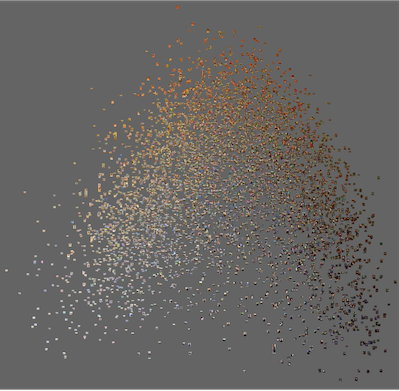

[Пример визуализации примерно 6000 картин французских импрессионистов](https://journals.ub.uni-heidelberg.de/index.php/dah/article/download/21631/15404) (страница 23) с использованием PCA. При такой визуализации сходные образы оказываются сгруппированы вместе. Предполагается, что такие визуализации позволяют сравнивать множество изображений друг с другом и понимать закономерности, сходства и различия в больших наборах визуальных данных.

[Еще пример использования PCA для анализа произведений искусства](https://people.csail.mit.edu/soonmin/CV/main.pdf)



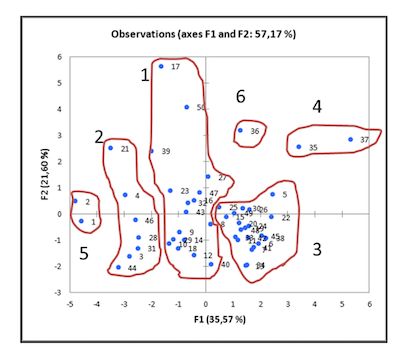

[МГК для ранжирования объектов разработки нефтяных месторождений](https://www.elibrary.ru/download/elibrary_27526721_86648538.pdf)

[МГК для исследования инвестиционного климата](https://www.elibrary.ru/download/elibrary_26001717_95834481.pdf)

# Индивидуальное задание 2.1



Возьмем данные из задания

In [ ]:
df = pd.read_csv('https://studio.openedu.ru/assets/courseware/v1/0187032bcfa54f8c26976dad7df1eec9/asset-v1:ITMOUniversity+MLDATAN+spring_2022_ITMO_bac+type@asset+block/7_25.csv',
                 header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,-21.759720,12.661154,-4.869926,9.598234,23.449185,0.154820,2.302482,-21.821396,-11.415078,2.151484
1,1.408364,-6.638400,9.211893,-5.495415,-0.645486,11.878330,-4.853190,21.437183,-15.858709,14.000808
2,2.616627,23.965814,-13.427229,3.159229,22.770143,-16.722209,1.080627,13.702021,6.303106,-0.961493
3,-23.049862,13.223549,-3.489613,9.938069,23.477814,-0.379360,0.077757,-24.087916,-11.868835,1.040066
4,4.397046,24.046032,-10.728164,2.437134,22.975698,-19.245294,1.665254,12.259758,6.068289,-1.225398


Можно посмотреть и на размер DF:

In [ ]:
df.shape

(60, 10)

Обучим модель на наших данных, учитывая то, что мы хотим получить всего 2 ГК

In [ ]:
pca = PCA(n_components = 2, svd_solver = 'full')
pca.fit(df)
pca_data = pca.transform(df)

Выведем полученные новые координаты объекта с индексом 0.

In [ ]:
pca_data[0]

array([-32.31442582,  -4.26100973])

По заданию нас просят вычислить долю объясненной дисперсии при использовании двух ГК. Для этого построим 10 ГК, тк изначально объекты обладали 10 признаками.

In [ ]:
pca = PCA(n_components = 10, svd_solver = 'full')
pca_data = pca.fit_transform(df)
pd.DataFrame(pca_data).head()

,0,1,2,3,4,5,6,7,8,9
0,-32.314426,-4.261010,-19.800263,-7.771393,-1.063335,-0.436510,-3.025227,0.307048,0.048406,-1.850081
1,-1.802036,34.004673,21.517786,-5.234282,-0.796676,-1.812273,0.523424,-0.611483,-2.867345,-0.057141
2,-17.862025,-23.660585,24.443583,3.792443,2.501468,0.260354,-0.223429,-2.614162,0.108997,-0.123967
3,-32.669013,-4.886266,-21.812915,-10.219300,-2.079339,0.289129,-2.613574,1.019712,1.420882,-0.784345
4,-18.379667,-24.282001,25.074947,3.285078,-0.810760,2.191675,-0.110948,-1.212577,-1.227794,0.279137


Доля объясненной дисперсии для каждой ГК хранится в поле `explained_variance_ratio_`, используем сумму с накоплением: `np.cumsum` и округлим все значения до трех знаков после запятой.

In [ ]:
pca.explained_variance_

array([634.63553882, 406.45583097, 363.66347391,  91.83402077,
         3.02177658,   2.73408528,   2.21519615,   1.5696697 ,
         1.49302445,   0.84505561])

In [ ]:
pca.explained_variance_ratio_

array([0.42071537, 0.26944948, 0.24108138, 0.06087901, 0.00200321,
       0.00181249, 0.00146851, 0.00104057, 0.00098976, 0.00056021])

In [ ]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)
explained_variance

array([0.42071537, 0.69016485, 0.93124624, 0.99212525, 0.99412846,
       0.99594095, 0.99740946, 0.99845003, 0.99943979, 1.        ])

Видно, что при использовании первых двух ГК доля объясненной дисперсии составляет примерно 0.69. Построим график зависимости доли объясненной дисперсии от количества используемых ГК.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


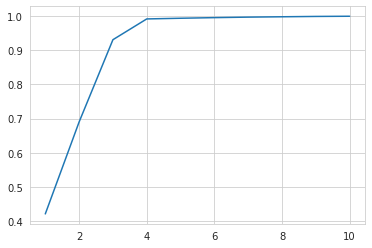

In [ ]:
sns.lineplot(np.arange(1,11), explained_variance, ls = '-')

Определим количество ГК, необходимых для превышения заданного порога доли объясненной дисперсии:

In [ ]:
treshold = 0.85
dim = 0
for value in explained_variance:
  if value > treshold:
    print('Минимальное количество ГК для заданного порога: ', dim + 1)
    break
  dim += 1

Минимальное количество ГК для заданного порога:  3


Вернемся к случаю только первых двух ГК и построим соответствующий график.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


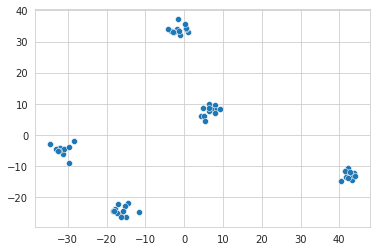

In [ ]:
sns.scatterplot(pca_data[:, 0], pca_data[:, 1])

Видно, что можно выделить 5 групп объектов.

# Индивидуальное задание 2.2

In [ ]:
df = pd.read_csv('https://studio.openedu.ru/assets/courseware/v1/b4ab1dc75144c50ef5fd51960a26a80b/asset-v1:ITMOUniversity+MLDATAN+spring_2022_ITMO_bac+type@asset+block/X_reduced_492.csv', header = None, delimiter = ';')
Phi = pd.read_csv('https://studio.openedu.ru/assets/courseware/v1/ccd8b40cd2f55b4c899db64587b05266/asset-v1:ITMOUniversity+MLDATAN+spring_2022_ITMO_bac+type@asset+block/X_loadings_492.csv', header = None, delimiter = ';')

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,-430.287369,-2.299082,-71.359899,33.307816,46.963533,-7.817365,40.445894,12.727879,3.251827,7.70431
1,-430.287369,-2.299082,-71.359899,33.307816,46.963533,-7.817365,40.445894,12.727879,3.251827,7.70431
2,-430.287369,-2.299082,-71.359899,33.307816,46.963533,-7.817365,40.445894,12.727879,3.251827,7.70431
3,-430.287369,-2.299082,-71.359899,33.307816,46.963533,-7.817365,40.445894,12.727879,3.251827,7.70431
4,-430.287369,-2.299082,-71.359899,33.307816,46.963533,-7.817365,40.445894,12.727879,3.251827,7.70431


In [ ]:
df.shape

(100, 10)

In [ ]:
Phi.shape

(100, 10)

In [ ]:
restored = np.dot(df, Phi.T)

In [ ]:
restored.shape

(100, 100)

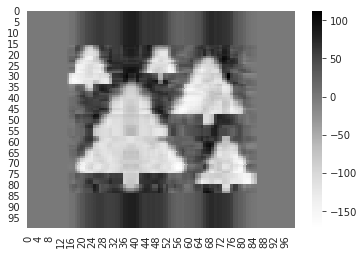

In [ ]:
sns.heatmap(restored, cmap = 'Greys')